# Dimension Reduction on MNIST

## Uploading and visualization the MNIST Dataset

In [1]:
# Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings # Current version of Seaborn generates a bunch of warnings that will be ignored.
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
# integrating dataset to python notebook
df = pd.read_csv('mnist_train.csv')

In [3]:
df.shape

(42000, 785)

In [4]:
# checking the data
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# separating the labels from the dataset
l = df['label']
d = df.drop('label',axis = 1)

In [6]:
# ploting a sample number visually
idx = 150

grid_data=d.iloc[idx].values.reshape(28,28) # reshaping from 1d to 2d

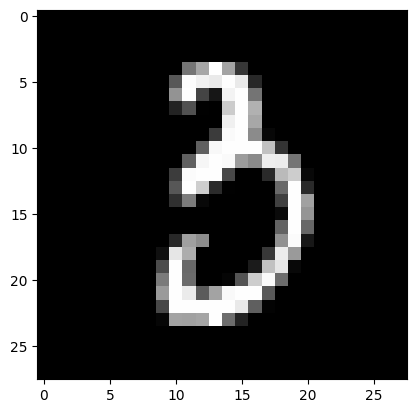

The above values is 3


In [7]:

plt.imshow(grid_data,cmap='gray')
plt.show()

print('The above values is',l[idx])

In [8]:
# Creating 5k data set with its labels
df = df.head(5000)
label = l.head(5000)
data = d.head(5000)
print('The shape of data is ',data.shape)

The shape of data is  (5000, 784)


## Data preprocessing : standardizing tha dataset

In [10]:
from sklearn.preprocessing import StandardScaler

standard_data = StandardScaler().fit_transform(data)
print(standard_data.shape)

(5000, 784)


In [11]:
standard_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Data visualization using PCA


#### Now let’s try!

You can read the documentation of `sklearn.decomposition.PCA` in [this link](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

In [12]:
from sklearn.decomposition import PCA

n_components = 2
pca = PCA(n_components)
pca.fit(data)
pca_data = pca.transform(standard_data)

# print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))
# print(pca.singular_values_)

0.16813167110222277


In [13]:
pca_data = PCA(n_components).fit_transform(standard_data)
pca_data

array([[-5.17348862, -5.09910333],
       [19.07758399,  6.51311393],
       [-7.72286885, -1.78444038],
       ...,
       [ 1.34909605, -5.87283164],
       [-5.1230553 ,  0.66297068],
       [-5.70637711, -3.05860132]])

In [14]:
pca_data.shape

(5000, 2)

#### Now let’s try!

In order to see how the PCA components are separating out the digits, lets use the following `seaborn.scatterplot()` function to plot the data in a 2 dimensional space to view separation.

You can read the documentation, especially the examples, of `seaborn` library in [this link](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) to check how to use `seaborn.scatterplot()`.


In [15]:
df['PC1'] = pca_data[:, 0]
df['PC2'] = pca_data[:, 1]
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,PC1,PC2
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-5.173489,-5.099103
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,19.077584,6.513114
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-7.722869,-1.784440
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.550703,5.741821
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,26.228807,6.771081


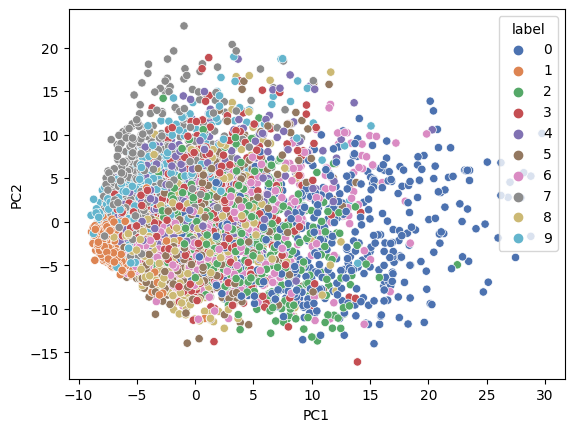

In [16]:
sns.scatterplot(data = df, x = 'PC1', y = 'PC2', hue = 'label', palette = 'deep')
plt.show()

Determing the right number of dimensions by visualizing the relationship between the number of principal components and their contribution.

In [17]:
pca = PCA()
pca.fit(data)
pca_ratio_raw = pca.explained_variance_ratio_

pca = PCA()
pca.fit(standard_data)
pca_ratio_standardized = pca.explained_variance_ratio_

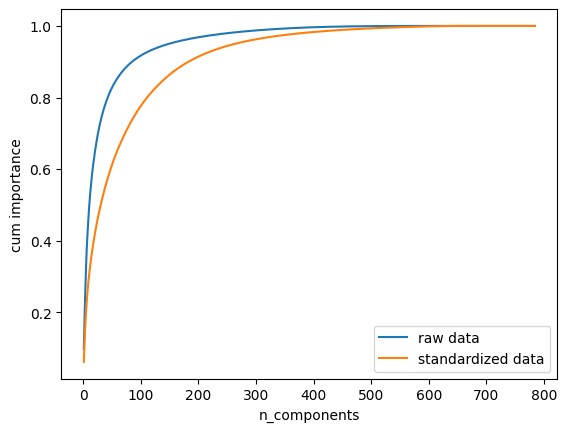

In [18]:
sns.lineplot(range(1, len(pca_ratio_raw) + 1), np.cumsum(pca_ratio_raw), label = 'raw data')
sns.lineplot(range(1, len(pca_ratio_standardized) + 1), np.cumsum(pca_ratio_standardized),
             label = 'standardized data')
plt.xlabel('n_components')
plt.ylabel('cum importance')
plt.legend()
plt.show()

## Data visualization using MDS

#### Now let’s try!

You can read the documentation of `sklearn.manifold.MDS` in [this link](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html).


In [19]:
from sklearn import manifold

data_lk = data.head(1000)
n_components = 2
mds = manifold.MDS(n_components)
mds_data = mds.fit_transform(data_lk)

In [20]:
df_lk = df.head(1000)
df_lk['MDS1'] = mds_data[:, 0]
df_lk['MDS2'] = mds_data[:, 1]
df_lk.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,PC1,PC2,MDS1,MDS2
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-5.173489,-5.099103,-304.036416,-1078.225038
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,19.077584,6.513114,-1421.325520,-2237.172083
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-7.722869,-1.784440,516.230029,-203.225702
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-0.550703,5.741821,1582.817242,-487.637193
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,26.228807,6.771081,2602.194382,-1369.160262


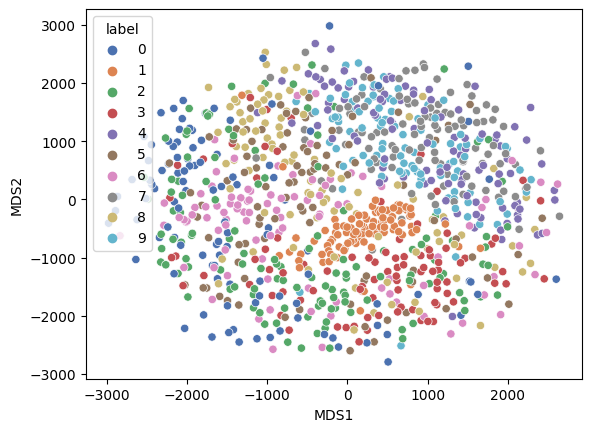

In [21]:
sns.scatterplot(data = df_lk, x = 'MDS1', y = 'MDS2', hue = 'label', palette = 'deep')
plt.show()

## Data visualization using LLE


#### Now let’s try!

You can read the documentation of `sklearn.manifold.LocallyLinearEmbedding` in [this link](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.LocallyLinearEmbedding.html).


In [22]:
n_neighbors = 30
n_components = 2
lle = manifold.LocallyLinearEmbedding(n_neighbors = n_neighbors, n_components = n_components)
lle_data = lle.fit_transform(data)

In [23]:
df['LLE1'] = lle_data[:, 0]
df['LLE2'] = lle_data[:, 1]
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,PC1,PC2,LLE1,LLE2
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-5.173489,-5.099103,0.060058,-0.010918
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,19.077584,6.513114,-0.001111,0.012217
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-7.722869,-1.784440,-0.035087,-0.044534
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-0.550703,5.741821,0.000793,0.006393
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,26.228807,6.771081,-0.000898,0.014061


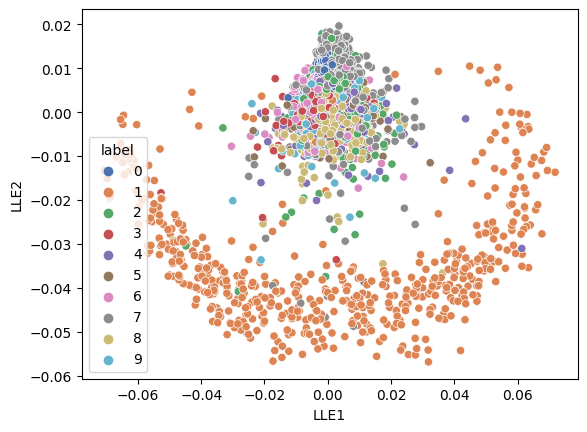

In [24]:
sns.scatterplot(data = df, x = 'LLE1', y = 'LLE2', hue = 'label', palette = 'deep')
plt.show()

## Data visualization using Laplacian Eigenmaps


#### Now let’s try!

You can read the documentation of `sklearn.manifold.SpectralEmbedding` in [this link](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.SpectralEmbedding.html).


In [29]:
n_neighbors = 30
n_components = 2
lapeig_data = manifold.SpectralEmbedding(n_neighbors = n_neighbors,
                                         n_components = n_components).fit_transform(data)

In [30]:
df['LapEig1'] = lapeig_data[:, 0]
df['LapEig2'] = lapeig_data[:, 1]
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel782,pixel783,PC1,PC2,LLE1,LLE2,SE1,SE2,LapEig1,LapEig2
0,1,0,0,0,0,0,0,0,0,0,...,0,0,-5.173489,-5.099103,0.060058,-0.010918,-0.001435,0.004079,-0.001435,0.004079
1,0,0,0,0,0,0,0,0,0,0,...,0,0,19.077584,6.513114,-0.001111,0.012217,0.007161,-0.002140,0.007161,-0.002140
2,1,0,0,0,0,0,0,0,0,0,...,0,0,-7.722869,-1.784440,-0.035087,-0.044534,-0.001760,0.004798,-0.001760,0.004798
3,4,0,0,0,0,0,0,0,0,0,...,0,0,-0.550703,5.741821,0.000793,0.006393,-0.001174,-0.002086,-0.001174,-0.002086
4,0,0,0,0,0,0,0,0,0,0,...,0,0,26.228807,6.771081,-0.000898,0.014061,0.007661,-0.002348,0.007661,-0.002348


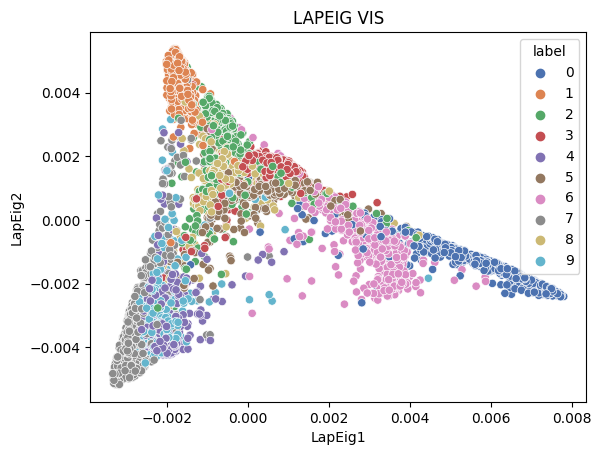

In [31]:
sns.scatterplot(data = df, x = 'LapEig1', y = 'LapEig2', hue = 'label', palette = 'deep')
plt.title('LAPEIG VIS')
plt.show()

## Data visualization using t-SNE



#### Now let’s try!

You can read the documentation of `sklearn.manifold.TSNE` in [this link](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html).


In [32]:
n_components = 2
tsne_data = manifold.TSNE(n_components = n_components).fit_transform(data)

In [33]:
df['TSNE1'] = tsne_data[:, 0]
df['TSNE2'] = tsne_data[:, 1]
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,PC1,PC2,LLE1,LLE2,SE1,SE2,LapEig1,LapEig2,TSNE1,TSNE2
0,1,0,0,0,0,0,0,0,0,0,...,-5.173489,-5.099103,0.060058,-0.010918,-0.001435,0.004079,-0.001435,0.004079,-39.212849,45.795925
1,0,0,0,0,0,0,0,0,0,0,...,19.077584,6.513114,-0.001111,0.012217,0.007161,-0.002140,0.007161,-0.002140,74.650780,9.914589
2,1,0,0,0,0,0,0,0,0,0,...,-7.722869,-1.784440,-0.035087,-0.044534,-0.001760,0.004798,-0.001760,0.004798,-40.488464,8.568077
3,4,0,0,0,0,0,0,0,0,0,...,-0.550703,5.741821,0.000793,0.006393,-0.001174,-0.002086,-0.001174,-0.002086,15.088619,-60.277695
4,0,0,0,0,0,0,0,0,0,0,...,26.228807,6.771081,-0.000898,0.014061,0.007661,-0.002348,0.007661,-0.002348,74.538017,11.132806


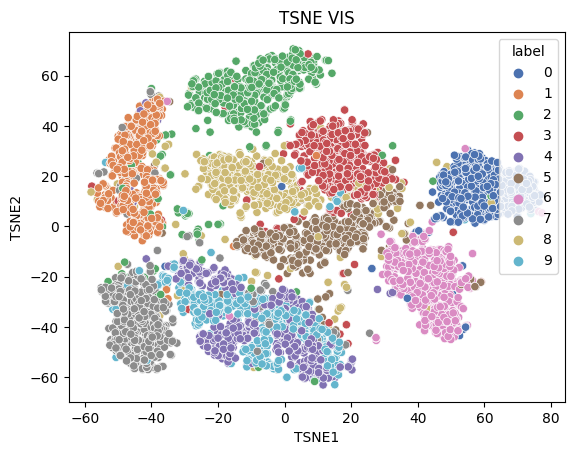

In [34]:
sns.scatterplot(data = df, x = 'TSNE1', y = 'TSNE2', hue = 'label', palette = 'deep')
plt.title('TSNE VIS')
plt.show()

In [35]:
from sklearn import datasets

n_samples = 150
x, color = datasets.make_s_curve(n_samples)

In [36]:
color

array([-0.32791298,  1.59116075,  1.83520092, -0.62900784,  2.93608399,
        0.06269187, -3.73788428,  2.95566264,  3.3527157 ,  1.96994693,
       -3.55159465, -0.96779471, -0.70616513, -0.95800558,  3.10313729,
        3.77364038, -2.666691  ,  2.76041774,  3.61167796, -0.70260673,
        0.72015736,  4.07511085, -1.42157023, -1.91452045, -1.91234513,
        3.93672543,  4.50750354,  2.13556639,  2.95203773,  2.8661272 ,
        0.04440092,  4.24518253, -0.36754333,  2.95062651, -3.72931707,
        0.15640958,  3.55116421, -0.48805789, -1.21702869,  2.40286848,
       -2.2359395 ,  3.84303447, -0.89762105, -3.05196928,  2.42677006,
        1.40121283,  1.31771602,  2.76181343, -4.15763324, -4.6718244 ,
        1.11750367, -4.65640974,  1.46479324,  4.52465828, -0.76294845,
        4.31026823, -2.86603078, -1.63235824, -1.50069213, -2.97686006,
        1.13882424, -3.98415924, -0.42442877, -3.19261506, -1.22777031,
        4.59349412, -2.00149329,  3.82775217, -2.89676542,  0.87

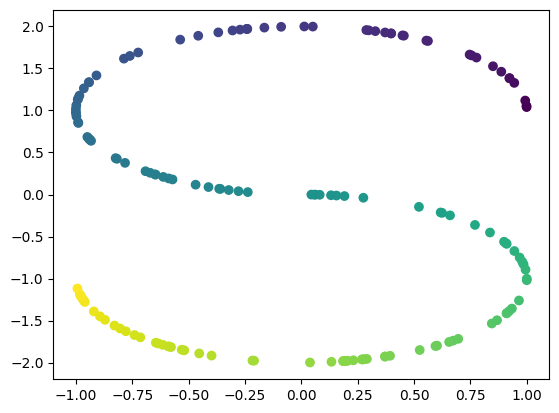

In [42]:
plt.scatter(x[:, 0], x[:, 2], c = color)
plt.show()

In [43]:
Y = manifold.TSNE(n_components = 2).fit_transform(x)

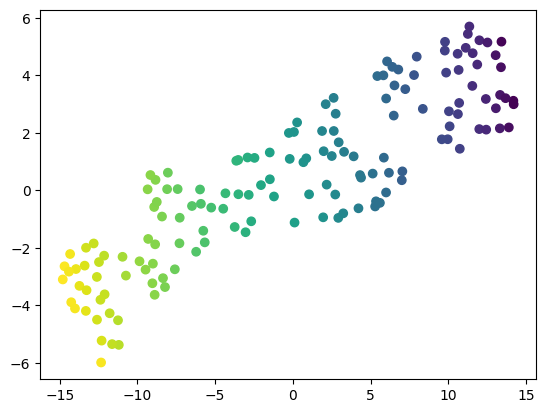

In [44]:
plt.scatter(Y[:, 0], Y[:, 1], c = color)
plt.show()

## 思考：以上所有降维方法的优劣之处是什么？